In [1]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
with open("./startup_funding.csv", "r", encoding="utf8") as file_object:
    csv_data = csv.DictReader(file_object, skipinitialspace = True)
    csv_data = list(csv_data)

df_data = pd.read_csv("./startup_funding.csv")

In [3]:
df_data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


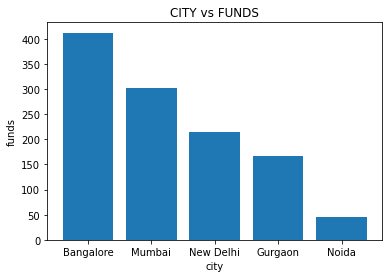

Bangalore 412
Mumbai 303
New Delhi 215
Gurgaon 166
Noida 46


In [4]:
"""
Your Friend has developed the Product and he wants to establish the product startup and 
he is searching for a perfect location where getting the investment has a high chance. 
But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, 
and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. 
Find the location where the most number of funding is done. That means, find the location where 
startups has received funding maximum number of times. Plot the bar graph between location and number of funding. 
Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. 
That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". 
For few startups multiple locations are given, one Indian and one Foreign. 
Consider the startup if any one of the city lies in given locations.
"""
def change_location_name(x):
    if str(x) == "Delhi" or str(x) == "delhi":
        x = "New Delhi"
        
    elif str(x) == "bangalore":
        x = "Bangalore"
    
    elif "/" in str(x):
        x = x.split("/")
        if "Bangalore" in x:
            x = "Bangalore"
        else:
            x = x[0].strip()
    return x

df_data["CityLocation"] = df_data["CityLocation"].apply(change_location_name)

location_list = ["Bangalore", "Mumbai", "Gurgaon", "Noida", "New Delhi"]
df = df_data.loc[df_data["CityLocation"].isin(location_list)]

df["AmountInUSD"] = df["AmountInUSD"].str.replace(",", "")
df["AmountInUSD"] = df["AmountInUSD"].astype("float64")

grouped_data = df.groupby("CityLocation")["AmountInUSD"].count()
grouped_data = grouped_data.sort_values(ascending = False)
city = grouped_data.index
funds = grouped_data.values

plt.bar(city, funds)
plt.ylabel('funds')
plt.xlabel('city')
plt.title('CITY vs FUNDS')
plt.show()

for x in range(len(funds)):
    print(city[x], funds[x])

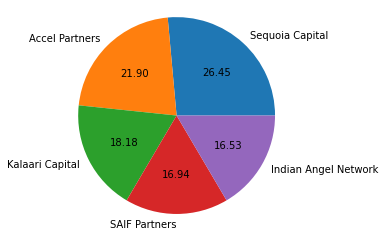

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


In [5]:
"""
Even after trying for so many times, your friend’s startup could not find the investment. 
So you decided to take this matter in your hand and try to find the list of investors who probably 
can invest in your friend’s startup. Your list will increase the chance of your friend startup getting 
some initial investment by contacting these investors. Find the top 5 investors who have invested maximum 
number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. 
So consider each investor for that startup. Ignore undisclosed investors.
"""
temp_df = df_data.copy()

temp_df["InvestorsName"] = temp_df["InvestorsName"].str.split(",")
temp_df = temp_df.explode("InvestorsName").reset_index(drop=True)
undisclosed_investors = temp_df[temp_df["InvestorsName"].apply(lambda x : str(x).startswith(("Undisclosed", "undisclosed")))]["InvestorsName"].value_counts().keys().tolist()
temp_df = temp_df[~temp_df["InvestorsName"].isin(undisclosed_investors)]
temp_df["InvestorsName"] = temp_df["InvestorsName"].str.strip()
temp_df = temp_df[temp_df["InvestorsName"]!=""]
ans = temp_df["InvestorsName"].value_counts()[0:5].to_dict()
labels = list(ans.keys())
values = list(ans.values())
plt.pie(values, labels = labels, autopct="%.2f")
plt.axis("equal")
plt.show()

for i in range(len(labels)):
    print(labels[i], values[i])



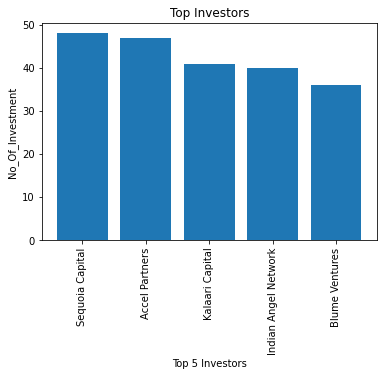

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


In [9]:
"""
After re-analysing the dataset you found out that some investors have invested in the 
same startup at different number of funding rounds. So before finalising the previous list, 
you want to improvise it by finding the top 5 investors who have invested in different number of startups. 
This list will be more helpful than your previous list in finding the investment for your friend startup. 
Find the top 5 investors who have invested maximum number of times in different companies.  
That means, if one investor has invested multiple times in one startup, count one for that company. 
There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.
"""
df = df_data.copy()
df = df_data.loc[:, ['InvestorsName', 'StartupName']]
df = df.dropna()
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

df["InvestorsName"] = df["InvestorsName"].str.split(",")
df = df.explode("InvestorsName").reset_index(drop=True)
undisclosed_investors = df[df["InvestorsName"].apply(lambda x : str(x).startswith(("Undisclosed", "undisclosed")))]["InvestorsName"].value_counts().keys().tolist()
df = df[~df["InvestorsName"].isin(undisclosed_investors)]
df["InvestorsName"] = df["InvestorsName"].str.strip()
df = df[df["InvestorsName"]!=""]
df = df.reset_index(drop=True)
top_groups = df.groupby("InvestorsName")["StartupName"].nunique().sort_values(ascending = False)[0:5]
labels = list(top_groups.keys())
values = list(top_groups.values)
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.xlabel('Top 5 Investors')
plt.ylabel('No_Of_Investment')
plt.title('Top Investors')
plt.show()

for i in range(len(values)):
    print(labels[i], values[i])

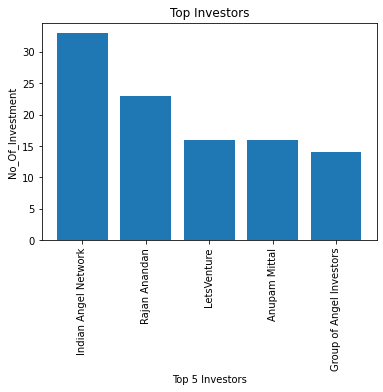

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Group of Angel Investors 14


In [7]:
"""
Even after putting so much effort in finding the probable investors, 
it didn't turn out to be helpful for your friend. So you went to your investor friend to 
understand the situation better and your investor friend explained to you about the different 
Investment Types and their features. This new information will be helpful in finding the right investor. 
Since your friend startup is at an early stage startup, the best-suited investment type would be -
Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups 
and their investment type is Crowdfunding or Seed Funding. Correct spelling of 
investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". 
Keep an eye for any spelling mistake. You can find this by printing unique values from this column. 
There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.
"""

df = df_data.copy()
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)


df["InvestorsName"] = df["InvestorsName"].str.split(",")
df = df.explode("InvestorsName").reset_index(drop=True)
undisclosed_investors = df[df["InvestorsName"].apply(lambda x : str(x).startswith(("Undisclosed", "undisclosed")))]["InvestorsName"].value_counts().keys().tolist()
df = df[~df["InvestorsName"].isin(undisclosed_investors)]
df["InvestorsName"] = df["InvestorsName"].str.strip()
df = df[df["InvestorsName"]!=""]
df = df.reset_index(drop=True)


df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

df = df[(df.InvestmentType == 'Crowd Funding') | (df.InvestmentType == 'Seed Funding')]
df1 = df.groupby('InvestorsName')['StartupName'].nunique().sort_values(ascending = False)
ans = df1[0:5]

labels = list(ans.keys())
values = list(ans.values)
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.xlabel('Top 5 Investors')
plt.ylabel('No_Of_Investment')
plt.title('Top Investors')
plt.show()

for i in range(len(values)):
    print(labels[i], values[i])

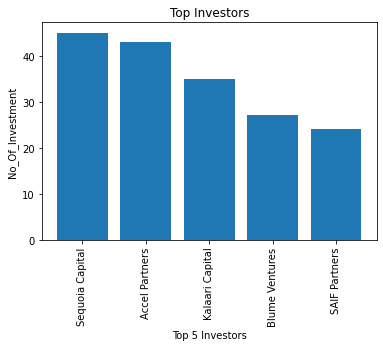

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


In [8]:
"""
Due to your immense help, your friend startup successfully got seed funding and 
it is on the operational mode. Now your friend wants to expand his startup and 
he is looking for new investors for his startup. Now you again come as a saviour 
to help your friend and want to create a list of probable new new investors. 
Before moving forward you remember your investor friend advice that finding the 
investors by analysing the investment type. Since your friend startup is not in early 
phase it is in growth stage so the best-suited investment type is Private Equity. 
Find the top 5 investors who have invested in a different number of startups and 
their investment type is Private Equity. 
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". 
Keep an eye for any spelling mistake. You can find this by printing unique values from this column. 
There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.
"""
df=df_data.copy()

df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

df["InvestorsName"] = df["InvestorsName"].str.split(",")
df = df.explode("InvestorsName").reset_index(drop=True)
undisclosed_investors = df[df["InvestorsName"].apply(lambda x : str(x).startswith(("Undisclosed", "undisclosed")))]["InvestorsName"].value_counts().keys().tolist()
df = df[~df["InvestorsName"].isin(undisclosed_investors)]
df["InvestorsName"] = df["InvestorsName"].str.strip()
df = df[df["InvestorsName"]!=""]
df = df.reset_index(drop=True)


df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

df = df[df.InvestmentType == 'Private Equity']
df1 = df.groupby('InvestorsName')['StartupName'].nunique().sort_values(ascending = False)
ans = df1[0:5]
labels = list(ans.keys())
values = list(ans.values)
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.xlabel('Top 5 Investors')
plt.ylabel('No_Of_Investment')
plt.title('Top Investors')
plt.show()

for i in range(len(values)):
    print(labels[i], values[i])